In [20]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

### Homework for week 6: 
This week you can choose between two assignments (you are of course free to to both if you want). In assignment A you will program the k means algorithm from scratch and compare it with the sklearn implementation. I assignment B you will work on a new toy dataset, apply the clustering algorithms we discussed in class and figure out some ways of visualization

# A: Write k-means from scratch

Just like last week I provide you with some function stubs to code your own k-means. However, if you want to write your own implementation go a head and do it! In particular when it comes to centroid initialization thater are many ways to do it (and very few are wrong). Also there are many possible stopping criteria for k-means. The implementation here works with a fixed number of iterations, but you can find a different way of doing it. If you use the fixed number of iterations, check how chnaging it will affect speed and accuracy

Finally test your algorithm on a toy dataset and visualize the results. Play around with the dataset, use more or less blobs, make them bigger and smaller.

Finally calcualte how much time your algorithm takes to train and compare it to the sklearn implementation. 

In [ ]:
def initialize_centroids(data, k): 
    # this function takes the trainig data and the number k of clusters
    # and returs a list of k centroids 
    
    # a simple way to to that is to just select k datapoints of the training data
    # look into np.random.choice
    pass
    return centroids

In [ ]:
def get_cluster_assignments(data, centroids): 
    # this function takes the data and the centroids and finds the cluster assignments
    # by calcualating how far each datapoint is from each centroid and assinging it to the nearest one 
    
    # look into np.linalg.norm and np.argmin
    pass

    cluster_assignments = []
    for datapoint in data: 
        distances = []
        for centroid in centroidsids: 
            # calculate distance between datapoint and centroid)
        #assignment = centroid with minimal distance to datapoint
        #cluster_assignments.append(assignment)
        
        
    return cluster_assignments

In [ ]:
def update_centroids(data, cluster_assignments, k): 
    # this function takes the data, the cluster assignments and the number of clusters and calculates the neew centroids
    pass
    new_centroids = []
    
    for cluster in range k:
        #centroid = average over all datapoints that are assigned to the cluster
        # look into np.where
        
    return new_centroids

In [ ]:
def k_means(data, k, iters=100):
    # this is the full k-means function. it takes the data and the number of clusters and returns the cluster assignments
    
    centroids = initialize_centroids(data, k)
    
    for i in range(iters): 
        cluster_assignments = get_cluster_assignments(data, centroids)
        centroids = update_centroids(data, cluster_assignments, centroids, k)
    
    return cluster_assignments, centroids

### Test your algorithm with toy data:

In [5]:
# create toy data
centers = [(0,0), (0,1), (1,0), (1,1)]
X, y = make_blobs(centers=centers, cluster_std=0.1)

In [ ]:
# find the clusters with your own algorithm
k = 4
cluster_assignments , centroids = k_means(X, k)

Text(0, 0.5, '$X_2$')

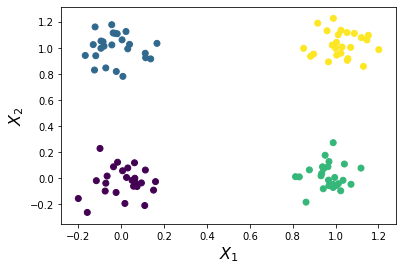

In [4]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title("True Lables", size=18)
plt.scatter(X[:, 0], X[:,1], c=y)
plt.xlabel('$X_1$', size=16)
plt.ylabel('$X_2$', size=16)

plt.subplot(122)
plt.title("Your Lables", size=18)
plt.scatter(X[:, 0], X[:,1], c=cluster_assignments)
plt.xlabel('$X_1$', size=16)
plt.ylabel('$X_2$', size=16)

#### Compare running times

In [ ]:
start = time()
cluster_lables, centroids, centroids_old = k_means(X, 4)
stop = time()
print("trainig time(handwritten)= {}".format(np.round(stop-start, 4)))

k_means_clf = KMeans(n_clusters=4)
start = time()
k_means_clf.fit(X)
stop = time()
print("trainig time (sklearn)= {}".format(np.round(stop-start, 4)))

# B: test some clustering algorithms on a new dataset

Here you will work on the wine dataset which measures 13 numeric attributes of three different wines (from three different cultivars). For your homework you should do the following: 

- Inspect the dataset: make some scatter plots and histograms to get an idea about the data
    - are the data on comparable scales or do they have to be normalized?
    - are the classes equally distributed?
- apply both K-means and Agglomerative Clustering and try the following: 
    - find a good number of clusters (ellbow plot)
    - find out if the data is evenly distributed across clusters (sillouette plot)
    - how well can the clustering algorithms identify the classes?
    - visualize the clusters( scatterplots, dendogram etc...)
    
For more information about the dataset go to: https://archive.ics.uci.edu/ml/datasets/Wine

In [8]:
from sklearn.datasets import load_wine

In [23]:
data = load_wine()
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [24]:
X = data['data']
y = data['target']
names = data['target_names']

#### a good way of visualizing clusters is by passing the cluster labels as the c argument in a scatter plot

In [25]:
km_clf = KMeans(n_clusters=3, random_state=2)
found_clusters =km_clf.fit_predict(X)

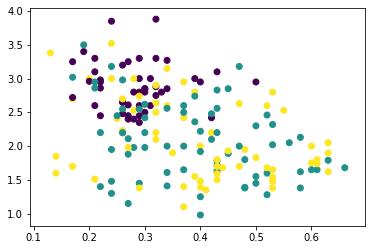

In [26]:
plt.scatter(X[:,7], X[:, 5], c= found_clusters)

but this is not a very informative plot:)